
#정일점: 
* 자유전공학부 안유빈 2017-14549
* 정치외교학부 지가영 2018-10149
* 자유전공학부 임채은 2019-10767
* 자유전공학부 윤가은 2020-11214
* 자유전공학부 김은혜 2020-13713
* 자유전공학부 이은비 2020-17042 

##주제: 샤로수길의 테마별 인기맛집 지도
* 거리가 자주 바뀌는 샤로수길에서 어떤 맛집이 어떤 점에서 유명한 지에 대한 호기심에서 시작하였습니다. 
* 맛집 리뷰에 대한 자료가 많이 존재하는 네이버 블로그의 최근 글 제목에서 언급 횟수가 많으면 인지도 높은 맛집이라고 가정하여, 자주 등장하는 샤로수길의 맛집 리스트를 추출하였습니다. 
* 또한, 맛집들의 특징을 글을 통해 파악하여 '분위기 좋은', '가성비 좋은', '혼밥하기 좋은', '데이트하기 좋은' 같은 특징별 샤로수길 맛집 지도를 만들어서 상황별로 필요한 지도를 사용할 수 있도록 시각화까지 하였습니다.  


In [ ]:
#전체코드

from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
from urllib.parse import urljoin

a=1 
b=1 
c=1 
all=[] 
while a in range(1,30): 
  if a<10:
    date='0'+str(a)
  else:
    date=a
  sep_url='https://search.naver.com/search.naver?where=blog&query=%EC%83%A4%EB%A1%9C%EC%88%98%EA%B8%B8+%EC%B6%94%EC%B2%9C&sm=tab_opt&dup_remove=1&post_blogurl=&post_blogurl_without=&nso=so%3Ar%2Ca%3Aall%2Cp%3Afrom202009'+str(date)+'to202009'+str(date)
  page=urlopen(sep_url)
  soup=BeautifulSoup(page, 'html.parser')
  title_soup = soup.find_all('div', 'total_wrap api_ani_send')
  print('09-'+str(a)) 
  for item in title_soup:
    print(item.find(class_='api_txt_lines total_tit').get_text()) 
    all.append(item.find(class_='api_txt_lines total_tit').get_text())
  print(" ")
  a=a+1

while b in range(1,31):
  if b<10:
    date='0'+str(b)
  else:
    date=b
  oct_url='https://search.naver.com/search.naver?where=blog&query=%EC%83%A4%EB%A1%9C%EC%88%98%EA%B8%B8+%EC%B6%94%EC%B2%9C&sm=tab_opt&dup_remove=1&post_blogurl=&post_blogurl_without=&nso=so%3Ar%2Ca%3Aall%2Cp%3Afrom202010'+str(date)+'to202010'+str(date)
  page=urlopen(oct_url)
  soup=BeautifulSoup(page, 'html.parser')
  title_soup = soup.find_all('div', 'total_wrap api_ani_send')
  print('10-'+str(b))  
  for item in title_soup:
    print(item.find(class_='api_txt_lines total_tit').get_text()) 
    all.append(item.find(class_='api_txt_lines total_tit').get_text())
  print(" ")
  b=b+1

while c in range(1,30):
  if c<10:
    date='0'+str(c)
  else:
    date=c
  nov_url='https://search.naver.com/search.naver?where=blog&query=%EC%83%A4%EB%A1%9C%EC%88%98%EA%B8%B8+%EC%B6%94%EC%B2%9C&sm=tab_opt&dup_remove=1&post_blogurl=&post_blogurl_without=&nso=so%3Ar%2Ca%3Aall%2Cp%3Afrom202011'+str(date)+'to202011'+str(date)
  page=urlopen(nov_url)
  soup=BeautifulSoup(page, 'html.parser')
  title_soup = soup.find_all('div', 'total_wrap api_ani_send')
  print('11-'+str(c)) 
  for item in title_soup:
    print(item.find(class_='api_txt_lines total_tit').get_text())  
    all.append(item.find(class_='api_txt_lines total_tit').get_text())
  print(" ")
  c=c+1

import csv
from bs4 import BeautifulSoup
import string

f = open('/content/서울특별시 관악구 일반음식점 인허가 정보.csv', 'r', encoding = 'cp949')
rdr = csv.reader(f)
d = open('/content/서울특별시 관악구 휴게음식점 인허가 정보.csv', 'r', encoding = 'cp949')
rdr2 = csv.reader(d)
#for line in rdr : 
  #print(line[5])
#f.close()

FoodPlace = []
for line in rdr : 
  if line[5] == "영업/정상" : 
    FoodPlace.append(line[18])
    #print(line[18])
  else :
    pass

DrinkPlace = []
for line in rdr2 : 
  if line[5] == "영업/정상" : 
    DrinkPlace.append(line[18])
    #print(line[18])
  else :
    pass

#print(FoodPlace)
#print(DrinkPlace)
FoodPlace.extend(DrinkPlace)
#print(FoodPlace)

sharo_list = []

i = 0
while i < len(FoodPlace) : 
  TargetPlace = FoodPlace[i]
  page = open('/content/샤로수길추천 (09.01 to 11.30) txt.txt','r').read().split("\n")
  count = 0
  for each_line in page : 
    if each_line.find(str(TargetPlace))>=0 :
      count += 1
    else :
      pass
  if count != 0 :
    sharo_list.append([count,TargetPlace])
  i += 1

sharo_list.sort(reverse=True)
for i in sharo_list:
  print(i)

import folium 
import numpy as np

name = ['올더플레이트', '킷사서울', '동경산책', '쥬벤쿠바', '문득', '텐동요츠야', '소디스커피', '온고지신', '온돌', '모즈', '안녕부산', '황홀경', '방콕야시장', '소블리', '라미스콘', '프랑스홍합집', '데일리오아시스', '가츠가게', '안녕베트남', '박명주브라더', '미엘', '고요서울', '충청삼겹', '아지트', '빠레뜨한남 샤로수길점', '잡', '미드레벨', '모힝', '마이무', '시트론오피스', '서울테이블', '려', '쿠모식당', '새실정원', '축상', '공간', '고기굽는사람들', '회장님댁', '이응가츠', '미스터하이볼', '커피집', '청신호', '오후의과일', '샤로스톤', '삼백돈돈가츠', '미분당', '더멜팅팟', '낭만', '안녕과자점', '순보보', '오늘그대와', '로향양꼬치', '도리도리', '다이조부', '교자킹', '호랑이면', '투고샐러드', '카롱시대', '오목눈이', '어부사시가', '앙뿌', '아비정전', '섭지수산', '백산식당', '미족원', '몽중인', '면화당', '멘쇼우라멘', '너구리덮밥', '나인온스버거', '고기박사 샤로수길점', '혼네', '피자네버슬립스', '쭈앤쭈', '조선펍에디', '이태리파파', '기절초풍왕순대', '심야식당 테이', '분짜하노이', '미미청', '데일리오아시스 샤로수길점', '달곱', '다이히로', '핵밥', '크라운호프', '코코미', '제주상회', '엘비스맥주', '압구정곱떡', '슬로우모션', '소년주막', '새우당', '삼미제면', '발빠닭 서울대입구점', '모다모다', '링고', '라화쿵부 서울대샤로수점', '독도쭈꾸미', '다르빛 두번째이야기', '뉴욕택시디저트', '낭만모로코', '남도반주', '낙성푸줏간', '까까']
lat = [37.4789734, 37.4791861, 37.4788509, 37.4776206, 37.4790747, 37.4789211, 37.478004, 37.4778732, 37.4786512, 37.4790413, 37.4787408, 37.478906, 37.4787138, 37.4785401, 37.4779406, 37.4789734, 37.4781127, 37.4766223, 37.4782015, 37.4784011, 37.479681, 37.4791861, 37.4792299, 37.4790532, 37.4783886, 37.4789727, 37.4785582, 37.4790279, 37.4769663, 37.4785401, 37.4789059, 37.4820814, 37.4789727, 37.4778276, 37.4798639, 37.4792971, 37.4782015, 37.4784534, 37.4789059, 37.482701, 37.4756614, 37.4778843, 37.4791817, 37.4785673, 37.4779581, 37.4778276, 37.4783172, 37.4779406, 37.4788338, 37.4774553, 37.4784736, 37.4775453, 37.4783545, 37.4788101, 37.4789734, 37.477174, 37.4778761, 37.4786628, 37.4786628, 37.4816193, 37.4789727, 37.4782257, 37.4784736, 37.4782198, 37.4784109, 37.4789734, 37.4777577, 37.4782119, 37.4790309, 37.4771776, 37.4789698, 37.4790093, 37.4786512, 37.4792085, 37.4794026, 37.4785381, 37.4780711, 37.4808177, 37.4788977, 37.4784163, 37.4781127, 37.4790279, 37.4795945, 37.4782967, 37.4784293, 37.478214, 37.4771776, 37.4776242, 37.4796013, 37.482701, 37.4790544, 37.4784969, 37.4785352, 37.4782198, 37.4787671, 37.4794764, 37.4806387, 37.4796569, 37.4778761, 37.479212, 37.4779406, 37.4782257, 37.479941, 37.4776686]
lng = [126.9537553, 126.9537648, 126.9541697, 126.957287, 126.9529942, 126.954465, 126.9555077, 126.9579426, 126.956964, 126.9535436, 126.9550633, 126.9545918, 126.9546623, 126.9569316, 126.9572079, 126.9537553, 126.9565871, 126.9585242, 126.956336, 126.9564994, 126.9547122, 126.9537648, 126.9555619, 126.9553473, 126.9553905, 126.9542856, 126.9560224, 126.9535036, 126.9586042, 126.9569316, 126.9539688, 126.9504444, 126.9542856, 126.9580789, 126.9551087, 126.9571914, 126.956336, 126.9562952, 126.9539688, 126.9528373, 126.9644278, 126.954095, 126.9534766, 126.9560302, 126.9552031, 126.9580789, 126.9560743, 126.9572079, 126.9547862, 126.9586686, 126.95614, 126.9590676, 126.9567307, 126.9543478, 126.9537553, 126.9565368, 126.9566345, 126.9568418, 126.9568418, 126.9417673, 126.9542856, 126.9559151, 126.95614, 126.9571871, 126.9557723, 126.9537553, 126.9560855, 126.9563075, 126.9555737, 126.9570749, 126.9577375, 126.9528334, 126.956964, 126.9532467, 126.9532869, 126.952832, 126.9584068, 126.9545584, 126.9526427, 126.9570917, 126.9565871, 126.9535036, 126.9587837, 126.9555862, 126.9564221, 126.9525562, 126.9583514, 126.9582039, 126.9549643, 126.9528373, 126.9531425, 126.9571358, 126.9552584, 126.9571871, 126.9544807, 126.9555121, 126.9529622, 126.9538204, 126.9566345, 126.9572004, 126.9572079, 126.9559151, 126.9552682, 126.9553788]

price = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0]
mood = [1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1]
quiet = [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0]
tidy = [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1]
date = [1,1,0,0,1,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0]


keyword = input('찾고 싶은 키워드를 선택해주세요(가성비, 분위기 좋은, 조용한, 깔끔한, 데이트 중 선택) (예시: 가성비, 깔끔한 / 가성비): ')
keyword = keyword.split(', ')

if '가성비' in keyword:
  mapping = folium.Map(location=[np.mean(np.array(lat)), np.mean(np.array(lng))], zoom_start=12)
  for n in range(len(lat)):
    if price[n] == 1: 
      folium.Marker([lat[n], lng[n]], popup=name[n]).add_to(mapping)
    else:
      pass
  mapping.save('sharosu_best_price.html')

if '분위기 좋은' in keyword:
  mapping = folium.Map(location=[np.mean(np.array(lat)), np.mean(np.array(lng))], zoom_start=12)
  for n in range(len(lat)):
    if mood[n] == 1: 
      folium.Marker([lat[n], lng[n]], popup=name[n]).add_to(mapping)
    else:
      pass
  mapping.save('sharosu_best_mood.html')

if '조용한' in keyword:
  mapping = folium.Map(location=[np.mean(np.array(lat)), np.mean(np.array(lng))], zoom_start=12)
  for n in range(len(lat)):
    if quiet[n] == 1: 
      folium.Marker([lat[n], lng[n]], popup=name[n]).add_to(mapping)
    else:
      pass
  mapping.save('sharosu_best_quiet.html')

if '깔끔한' in keyword:
  mapping == folium.Map(location=[np.mean(np.array(lat)), np.mean(np.array(lng))], zoom_start=12)
  for n in range(len(lat)):
    if tidy[n] == 1: 
      folium.Marker([lat[n], lng[n]], popup=name[n]).add_to(mapping)
    else:
      pass
  mapping.save('sharosu_best_tidy.html')

if '데이트' in keyword:
  mapping == folium.Map(location=[np.mean(np.array(lat)), np.mean(np.array(lng))], zoom_start=12)
  for n in range(len(lat)):
    if date[n] == 1: 
      folium.Marker([lat[n], lng[n]], popup=name[n]).add_to(mapping)
    else:
      pass
  mapping.save('sharosu_best_date.html')


price = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0]
mood = [1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1]
quiet = [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0]
tidy = [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1]
date = [1,1,0,0,1,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0]


!apt-get install fonts-nanum*

import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
sys_font

import matplotlib.pyplot as plt 
from matplotlib import rc 
import matplotlib as mpl
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd
count_list = [price.count(1), mood.count(1), quiet.count(1), tidy.count(1), date.count(1)]
keyword_list = ['가성비', '분위기 좋은', '조용한', '깔끔한', '데이트']
d1=pd.DataFrame(count_list, index=keyword_list)

d1.plot(kind='bar')
plt.title('키워드 분석')
plt.ylabel('개수')
plt.xlabel('키워드')
plt.show()

  
   

#부분코드1: 블로그에서 데이터를 추출하는 코드 
2020년 9월 1일부터 2020년 11월 30일까지의 네이버 블로그 글들 중 제목에서 "샤로수길 추천" 이 포함된 글들을 크롤링하기 위하여 날짜별 링크를 만들고, 날짜별 링크에서 제목이 포함된 부분에서 30개의 제목을 추출한다. 

30개씩 날짜별 추출하는 이유는, 네이버 블로그가 마우스 커서를 내릴 때 자동으로 새로운 글이 업데이트 되는 방식이기 때문에 날짜별이 아니라 기간 전체로 했을 때 제목을 전체 추출하기가 어렵기 때문이다. 
또한, 날짜별 '샤로수길 추천'이 제목에 포함된 블로그 글은 30개를 거의 넘지 않기 때문에 이러한 방식으로 전체를 추출할 수 있다. 

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
from urllib.parse import urljoin

a=1 #9월의 리스트를 추출하기 위한 변수이다. 
b=1 #10월의 리스트를 추출하기 위한 변수이다.
c=1 #11월의 리스트를 추출하기 위한 변수이다. 
all=[] #블로그 제목들이 나열될 리스트이다. 
while a in range(1,30): 
  if a<10:
    date='0'+str(a)
  else:
    date=a
  sep_url='https://search.naver.com/search.naver?where=blog&query=%EC%83%A4%EB%A1%9C%EC%88%98%EA%B8%B8+%EC%B6%94%EC%B2%9C&sm=tab_opt&dup_remove=1&post_blogurl=&post_blogurl_without=&nso=so%3Ar%2Ca%3Aall%2Cp%3Afrom202009'+str(date)+'to202009'+str(date)
  page=urlopen(sep_url)
  soup=BeautifulSoup(page, 'html.parser')
  title_soup = soup.find_all('div', 'total_wrap api_ani_send')
  print('09-'+str(a)) #날짜별 구분을 하기 위하여 날짜를 먼저 프린트한다. 
  for item in title_soup:
    print(item.find(class_='api_txt_lines total_tit').get_text()) #링크 속 제목을 따기 위한 코드이다. 
    all.append(item.find(class_='api_txt_lines total_tit').get_text())
  print(" ")
  a=a+1

while b in range(1,31):
  if b<10:
    date='0'+str(b)
  else:
    date=b
  oct_url='https://search.naver.com/search.naver?where=blog&query=%EC%83%A4%EB%A1%9C%EC%88%98%EA%B8%B8+%EC%B6%94%EC%B2%9C&sm=tab_opt&dup_remove=1&post_blogurl=&post_blogurl_without=&nso=so%3Ar%2Ca%3Aall%2Cp%3Afrom202010'+str(date)+'to202010'+str(date)
  page=urlopen(oct_url)
  soup=BeautifulSoup(page, 'html.parser')
  title_soup = soup.find_all('div', 'total_wrap api_ani_send')
  print('10-'+str(b)) #날짜별 구분을 하기 위하여 날짜를 먼저 프린트한다. 
  for item in title_soup:
    print(item.find(class_='api_txt_lines total_tit').get_text()) #링크 속 제목을 따기 위한 코드이다. 
    all.append(item.find(class_='api_txt_lines total_tit').get_text())
  print(" ")
  b=b+1

while c in range(1,30):
  if c<10:
    date='0'+str(c)
  else:
    date=c
  nov_url='https://search.naver.com/search.naver?where=blog&query=%EC%83%A4%EB%A1%9C%EC%88%98%EA%B8%B8+%EC%B6%94%EC%B2%9C&sm=tab_opt&dup_remove=1&post_blogurl=&post_blogurl_without=&nso=so%3Ar%2Ca%3Aall%2Cp%3Afrom202011'+str(date)+'to202011'+str(date)
  page=urlopen(nov_url)
  soup=BeautifulSoup(page, 'html.parser')
  title_soup = soup.find_all('div', 'total_wrap api_ani_send')
  print('11-'+str(c)) #날짜별 구분을 하기 위하여 날짜를 먼저 프린트한다. 
  for item in title_soup:
    print(item.find(class_='api_txt_lines total_tit').get_text()) #링크 속 제목을 따기 위한 코드이다. 
    all.append(item.find(class_='api_txt_lines total_tit').get_text())
  print(" ")
  c=c+1

#print(all)
  
   


09-1
[서울대입구] 샤로수길 맛집 추천 킷사서울! 솔직후기~
샤로수길데이트추천 서울대입구술집 프랑스홍합집
샤로수길 파스타 문득 : 서울대입구 맛집, 데이트코스로 추천 !
샤로수길데이트추천 :킷샤서울
샤로수길 하울링데이즈 존맛탱추천
샤로수길 감성 분위기 카페 <황홀경> 다녀왔어요~
샤로수길 맛집 하울링데이즈 수제버거 뿌수기!
서울대입구 샤로수길 카페_계절마다 다른 디저트 빙수... 
[샤로수길맛집] 동네사람이 추천하는 안주 맛있는 혼네!
샤로수길맛집 문득 두번가세요~~
샤로수길 ‘남도분식’ 포장해서 집에서 먹기
샤로수길 디저트 카페 '소디스커피' 타르트 맛집
샤로수길 맛집 | 나의 특별한 날에 '모힝'을 선택
[샤로수길 카페/서울대입구 카페] 취향 저격 카페 청신호
샤로수길 커피볶는여자 맛있어요 :)
[샤로수길 맛집] 텐동 요츠야-인생 텐동 ..♡
[샤로수길 맛집] 데이트하러 오랜만에 선택한 곳 - 아로이팟타이... 
[샤로수길 맛집]에그썸 방문기!
서울; 서울대입구; 샤로수길; 맛집; 더멜팅팟
[서울/신림동]서울대입구역 이자카야 맛집 '오지편한식당... 
서울대입구맛집! 라멘이땡긴다면?! 멘쇼우라멘으로❣
일을 시작하며 제일 많이 놀러갔던 곳은, 홍대!
[맛집] 서울대입구 일식당 킷사서울, 홍콩와플 미드레벨
Aug, daily 27
가봤습니다. ® 안녕부산 감사합니다.
8월 정산과 개강
Daily life in July
2020년 7-8월
호캉스도 가고 인천, 강릉으로 바다도 보러 가고 바쁘게... 
 
09-2
샤로수길 돈가츠 맛집 추천! 두툼한 돈가츠 삼백돈돈가츠... 
샤로수길 돈까스 맛집! 이응가츠에서 모듬가츠 드셔라..
맛집 샤로수길 파스타 데이트코스로 추천합니다! 샤로수길 문득 :-)
프랑스홍합집 샤로수길 맛집
서울대입구 맛집, 샤로수길 삼백돈 돈가츠 ! 데이트 필수코스
서울대입구 / 샤로수길 파스타 찐맛집, 문득
포장해오기, 샤로수길 프랑스 가정식 맛집, 샤로수길데이트... 
샤로수길 돈가츠 돈까스의 재발견! 삼백돈돈가츠
[서울대입구] 인스타갬성

#부분코드2: 맛집별 빈도수 분석 코드
공공데이터 포털에서 관악구에 위치한 일반음식점/휴게음식점 인허가 파일을 csv로 다운로드 받은 후, 폐업하지 않고 정상 운영 중입 음식점 이름을 뽑아 리스트로 만들었다.

앞서 추출한 블로그 제목을 문장으로 나눈 후, 관악구에 위치한 음식점 이름을 포함하고 있는 빈도수를 세는 반복문을 만들었다. 그 후, 블로그 제목에 등장한 빈도가 큰 순서대로 음식점 리스트를 출력해냈다.  

In [ ]:
import csv
from bs4 import BeautifulSoup
import string

f = open('/content/서울특별시 관악구 일반음식점 인허가 정보.csv', 'r', encoding = 'cp949')
rdr = csv.reader(f)
d = open('/content/서울특별시 관악구 휴게음식점 인허가 정보.csv', 'r', encoding = 'cp949')
rdr2 = csv.reader(d)
#for line in rdr : 
  #print(line[5])
#f.close()

FoodPlace = []
for line in rdr : 
  if line[5] == "영업/정상" : 
    FoodPlace.append(line[18])
    #print(line[18])
  else :
    pass

DrinkPlace = []
for line in rdr2 : 
  if line[5] == "영업/정상" : 
    DrinkPlace.append(line[18])
    #print(line[18])
  else :
    pass

#print(FoodPlace)
#print(DrinkPlace)
FoodPlace.extend(DrinkPlace)
#print(FoodPlace)

sharo_list = []

i = 0
while i < len(FoodPlace) : 
  TargetPlace = FoodPlace[i]
  page = open('/content/샤로수길추천 (09.01 to 11.30) txt.txt','r').read().split("\n")
  count = 0
  for each_line in page : 
    if each_line.find(str(TargetPlace))>=0 :
      count += 1
    else :
      pass
  if count != 0 :
    sharo_list.append([count,TargetPlace])
  i += 1

sharo_list.sort(reverse=True)
for i in sharo_list:
  print(i)

#부분코드3: 데이터 시각화 코드

##시각화 파트 1 - 지도
먼저 수집한 맛집 리스트의 위치를 구글 문서를 통해 불러왔다. 스프레드시트를 활용하여 위경도를 수집한 후, 팀 내에서 정한 5가지 키워드를 리스트로 정리하였다.
사용자가 원하는 키워드를 선택하면 각 키워드에 해당하는 맛집 지도가 파일로 저장된다. 

In [ ]:
import folium 
import numpy as np

name = ['올더플레이트', '킷사서울', '동경산책', '쥬벤쿠바', '문득', '텐동요츠야', '소디스커피', '온고지신', '온돌', '모즈', '안녕부산', '황홀경', '방콕야시장', '소블리', '라미스콘', '프랑스홍합집', '데일리오아시스', '가츠가게', '안녕베트남', '박명주브라더', '미엘', '고요서울', '충청삼겹', '아지트', '빠레뜨한남 샤로수길점', '잡', '미드레벨', '모힝', '마이무', '시트론오피스', '서울테이블', '려', '쿠모식당', '새실정원', '축상', '공간', '고기굽는사람들', '회장님댁', '이응가츠', '미스터하이볼', '커피집', '청신호', '오후의과일', '샤로스톤', '삼백돈돈가츠', '미분당', '더멜팅팟', '낭만', '안녕과자점', '순보보', '오늘그대와', '로향양꼬치', '도리도리', '다이조부', '교자킹', '호랑이면', '투고샐러드', '카롱시대', '오목눈이', '어부사시가', '앙뿌', '아비정전', '섭지수산', '백산식당', '미족원', '몽중인', '면화당', '멘쇼우라멘', '너구리덮밥', '나인온스버거', '고기박사 샤로수길점', '혼네', '피자네버슬립스', '쭈앤쭈', '조선펍에디', '이태리파파', '기절초풍왕순대', '심야식당 테이', '분짜하노이', '미미청', '데일리오아시스 샤로수길점', '달곱', '다이히로', '핵밥', '크라운호프', '코코미', '제주상회', '엘비스맥주', '압구정곱떡', '슬로우모션', '소년주막', '새우당', '삼미제면', '발빠닭 서울대입구점', '모다모다', '링고', '라화쿵부 서울대샤로수점', '독도쭈꾸미', '다르빛 두번째이야기', '뉴욕택시디저트', '낭만모로코', '남도반주', '낙성푸줏간', '까까']
lat = [37.4789734, 37.4791861, 37.4788509, 37.4776206, 37.4790747, 37.4789211, 37.478004, 37.4778732, 37.4786512, 37.4790413, 37.4787408, 37.478906, 37.4787138, 37.4785401, 37.4779406, 37.4789734, 37.4781127, 37.4766223, 37.4782015, 37.4784011, 37.479681, 37.4791861, 37.4792299, 37.4790532, 37.4783886, 37.4789727, 37.4785582, 37.4790279, 37.4769663, 37.4785401, 37.4789059, 37.4820814, 37.4789727, 37.4778276, 37.4798639, 37.4792971, 37.4782015, 37.4784534, 37.4789059, 37.482701, 37.4756614, 37.4778843, 37.4791817, 37.4785673, 37.4779581, 37.4778276, 37.4783172, 37.4779406, 37.4788338, 37.4774553, 37.4784736, 37.4775453, 37.4783545, 37.4788101, 37.4789734, 37.477174, 37.4778761, 37.4786628, 37.4786628, 37.4816193, 37.4789727, 37.4782257, 37.4784736, 37.4782198, 37.4784109, 37.4789734, 37.4777577, 37.4782119, 37.4790309, 37.4771776, 37.4789698, 37.4790093, 37.4786512, 37.4792085, 37.4794026, 37.4785381, 37.4780711, 37.4808177, 37.4788977, 37.4784163, 37.4781127, 37.4790279, 37.4795945, 37.4782967, 37.4784293, 37.478214, 37.4771776, 37.4776242, 37.4796013, 37.482701, 37.4790544, 37.4784969, 37.4785352, 37.4782198, 37.4787671, 37.4794764, 37.4806387, 37.4796569, 37.4778761, 37.479212, 37.4779406, 37.4782257, 37.479941, 37.4776686]
lng = [126.9537553, 126.9537648, 126.9541697, 126.957287, 126.9529942, 126.954465, 126.9555077, 126.9579426, 126.956964, 126.9535436, 126.9550633, 126.9545918, 126.9546623, 126.9569316, 126.9572079, 126.9537553, 126.9565871, 126.9585242, 126.956336, 126.9564994, 126.9547122, 126.9537648, 126.9555619, 126.9553473, 126.9553905, 126.9542856, 126.9560224, 126.9535036, 126.9586042, 126.9569316, 126.9539688, 126.9504444, 126.9542856, 126.9580789, 126.9551087, 126.9571914, 126.956336, 126.9562952, 126.9539688, 126.9528373, 126.9644278, 126.954095, 126.9534766, 126.9560302, 126.9552031, 126.9580789, 126.9560743, 126.9572079, 126.9547862, 126.9586686, 126.95614, 126.9590676, 126.9567307, 126.9543478, 126.9537553, 126.9565368, 126.9566345, 126.9568418, 126.9568418, 126.9417673, 126.9542856, 126.9559151, 126.95614, 126.9571871, 126.9557723, 126.9537553, 126.9560855, 126.9563075, 126.9555737, 126.9570749, 126.9577375, 126.9528334, 126.956964, 126.9532467, 126.9532869, 126.952832, 126.9584068, 126.9545584, 126.9526427, 126.9570917, 126.9565871, 126.9535036, 126.9587837, 126.9555862, 126.9564221, 126.9525562, 126.9583514, 126.9582039, 126.9549643, 126.9528373, 126.9531425, 126.9571358, 126.9552584, 126.9571871, 126.9544807, 126.9555121, 126.9529622, 126.9538204, 126.9566345, 126.9572004, 126.9572079, 126.9559151, 126.9552682, 126.9553788]

price = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0]
mood = [1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1]
quiet = [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0]
tidy = [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1]
date = [1,1,0,0,1,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0]


keyword = input('찾고 싶은 키워드를 선택해주세요(가성비, 분위기 좋은, 조용한, 깔끔한, 데이트 중 선택) (예시: 가성비, 깔끔한 / 가성비): ')
keyword = keyword.split(', ')

if '가성비' in keyword:
  mapping = folium.Map(location=[np.mean(np.array(lat)), np.mean(np.array(lng))], zoom_start=12)
  for n in range(len(lat)):
    if price[n] == 1: 
      folium.Marker([lat[n], lng[n]], popup=name[n]).add_to(mapping)
    else:
      pass
  mapping.save('sharosu_best_price.html')

if '분위기 좋은' in keyword:
  mapping = folium.Map(location=[np.mean(np.array(lat)), np.mean(np.array(lng))], zoom_start=12)
  for n in range(len(lat)):
    if mood[n] == 1: 
      folium.Marker([lat[n], lng[n]], popup=name[n]).add_to(mapping)
    else:
      pass
  mapping.save('sharosu_best_mood.html')

if '조용한' in keyword:
  mapping = folium.Map(location=[np.mean(np.array(lat)), np.mean(np.array(lng))], zoom_start=12)
  for n in range(len(lat)):
    if quiet[n] == 1: 
      folium.Marker([lat[n], lng[n]], popup=name[n]).add_to(mapping)
    else:
      pass
  mapping.save('sharosu_best_quiet.html')

if '깔끔한' in keyword:
  mapping == folium.Map(location=[np.mean(np.array(lat)), np.mean(np.array(lng))], zoom_start=12)
  for n in range(len(lat)):
    if tidy[n] == 1: 
      folium.Marker([lat[n], lng[n]], popup=name[n]).add_to(mapping)
    else:
      pass
  mapping.save('sharosu_best_tidy.html')

if '데이트' in keyword:
  mapping == folium.Map(location=[np.mean(np.array(lat)), np.mean(np.array(lng))], zoom_start=12)
  for n in range(len(lat)):
    if date[n] == 1: 
      folium.Marker([lat[n], lng[n]], popup=name[n]).add_to(mapping)
    else:
      pass
  mapping.save('sharosu_best_date.html')

#부분코드3: 데이터 시각화 코드
##시각화 파트 2 - 그래프 

수집한 키워드에 해당하는 맛집의 개수를 비교하여 샤로수길의 전반적인 상권 분위기를 파악할 수 있도록 막대 그래프로 시각화하였다.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 14 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-extra all 20170925-1 [12.2 MB]
Get:4 http://archive.ubu

findfont: Font family ['NanumMyeongjo'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumMyeongjo'] not found. Falling back t

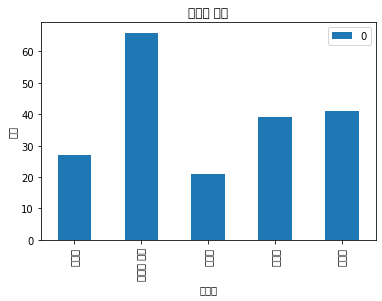

In [ ]:
price = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0]
mood = [1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1]
quiet = [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0]
tidy = [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1]
date = [1,1,0,0,1,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0]


!apt-get install fonts-nanum*

import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
sys_font

import matplotlib.pyplot as plt 
from matplotlib import rc 
import matplotlib as mpl
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd
count_list = [price.count(1), mood.count(1), quiet.count(1), tidy.count(1), date.count(1)]
keyword_list = ['가성비', '분위기 좋은', '조용한', '깔끔한', '데이트']
d1=pd.DataFrame(count_list, index=keyword_list)

d1.plot(kind='bar')
plt.title('키워드 분석')
plt.ylabel('개수')
plt.xlabel('키워드')
plt.show()
